# [NetworkX](https://networkx.github.io/)
Notes Part 2


NetworkX provides generators for several random graph models. A complete list is available on this [page](https://networkx.github.io/documentation/stable/reference/generators.html#module-networkx.generators.random_graphs).

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

## Uniform random graph

A simple way to generate a random graph is by relying on a uniform assignment of edges to nodes. For example, given $n$ nodes and a total number of $m$ edges, we can assign edges randomly to the nodes with:
```python
dense_gnm_random_graph(n, m, seed=None)
```
Similarly, given $n$ nodes, we can define a uniform edge probability $p$ between any pair of two nodes as we described in the Erdős–Rényi model:
```python
fast_gnp_random_graph(n, p, seed=None, directed=False)
```

In both cases, `seed` is a random seed for the random assignment.

Let's first generate a graph $G_{nm}$ with 10 nodes and 20 edges in total:

Gnm has 10 nodes and 20 edges.


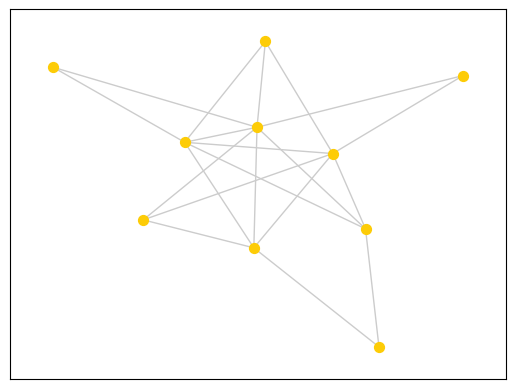

In [2]:
Gnm = nx.dense_gnm_random_graph(10, 20, seed=42)
pos = nx.spring_layout(Gnm)
nx.draw_networkx(Gnm, pos=pos, with_labels=False, node_color='#FDCC07', edge_color='#cccccc', node_size=50)
print(f"Gnm has {len(Gnm.nodes)} nodes and {len(Gnm.edges)} edges.")

Similarly, let's generate a graph $G_{np}$ with 10 nodes and the probability of an edge existing between any pair of nodes as $0.4$:

Gnm has 10 nodes and 22 edges.


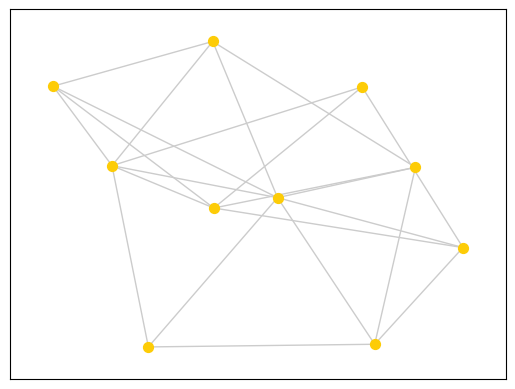

In [3]:
Gnp = nx.fast_gnp_random_graph(10, 0.4, seed=42)
pos = nx.spring_layout(Gnp)
nx.draw_networkx(Gnp, pos=pos, with_labels=False, node_color='#FDCC07', edge_color='#cccccc', node_size=50)
print(f"Gnm has {len(Gnp.nodes)} nodes and {len(Gnp.edges)} edges.")

## Preferential attachment model
NetworkX provides an implementation of the [Barabási–Albert preferential attachment model](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html#networkx.generators.random_graphs.barabasi_albert_graph):
```python
barabasi_albert_graph(n, m)
```
Here $n$ is the number of nodes in total and $m$ is the number of edges to be created between each new node and the existing nodes, with a preference for creating edges with high degree nodes.

Let's create a graph with 50 nodes and connect each newly added node to 1 existing node.

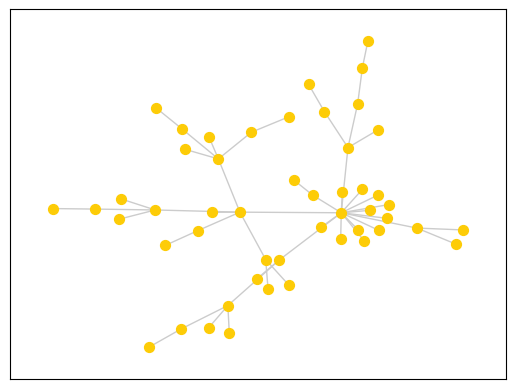

In [4]:
Gpa = nx.barabasi_albert_graph(50, 1, seed=42)
pos = nx.spring_layout(Gpa)
nx.draw_networkx(Gpa, pos=pos, with_labels=False, node_color='#FDCC07', edge_color='#cccccc', node_size=50)

## Small world networks

NetworkX provides several methods for generating small world networks with slight differences:
- [Watts–Strogatz small world graph](https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.watts_strogatz_graph.html#networkx.generators.random_graphs.watts_strogatz_graph)

> First, connect each node with its $k$ nearest neighbors (or $k-1$ if $k$ is odd). Then replace each edge $(u, v)$ with probability $p$ by a new edge $(u, w)$ where node $w$ is randomly-chosen. The graph generated is not guaranteed to be connected.
```python
watts_strogatz_graph(n, k, p, seed=None)```

- [Connected Watts–Strogatz small world graph](https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.connected_watts_strogatz_graph.html#networkx.generators.random_graphs.connected_watts_strogatz_graph)

> Repeat the procedure of `watts_strogatz_graph` until a connected graph is generated. We can also specify the maximum number of attempts by setting the parameter `tries`.
```python
connected_watts_strogatz_graph(n, k, p, tries=100, seed=None)```

- [Newman–Watts–Strogatz small world graph](https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.newman_watts_strogatz_graph.html#networkx.generators.random_graphs.newman_watts_strogatz_graph)

> First, connect each node with its $k$ nearest neighbors (or $k-1$ if $k$ is odd). Then for each edge $(u, v)$, a new edge $(u, w)$ is crated with probability $p$ where node $w$ is randomly-chosen.
```python
newman_watts_strogatz_graph(n, k, p, seed=None)```


Let's first create a small world model with `watts_strogatz_graph`. We can compare the effect of edge rewiring by setting different values for $p$.

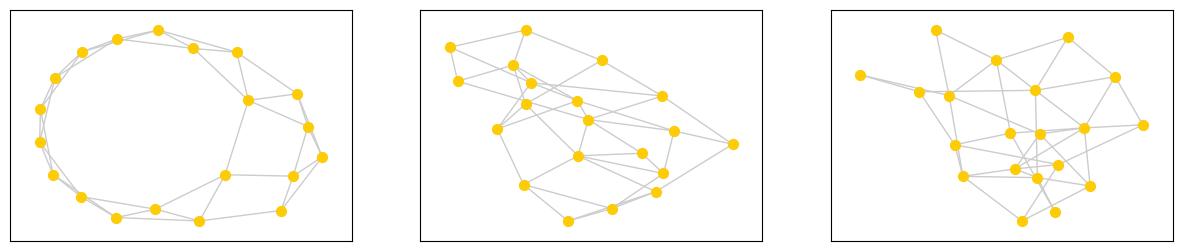

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15,3))
Gws1 = nx.watts_strogatz_graph(20, 4, 0.01, seed=42)
Gws2 = nx.watts_strogatz_graph(20, 4, 0.5, seed=42)
Gws3 = nx.watts_strogatz_graph(20, 4, 0.99, seed=42)
pos1 = nx.spring_layout(Gws1)
pos2 = nx.spring_layout(Gws2)
pos3 = nx.spring_layout(Gws3)
nx.draw_networkx(Gws1, pos=pos1,with_labels=False,  node_color='#FDCC07',
                 edge_color='#cccccc', node_size=50, ax=axes[0])
nx.draw_networkx(Gws2, pos=pos2,with_labels=False,  node_color='#FDCC07',
                 edge_color='#cccccc', node_size=50, ax=axes[1])
nx.draw_networkx(Gws3, pos=pos3,with_labels=False,  node_color='#FDCC07',
                 edge_color='#cccccc', node_size=50, ax=axes[2])

Next, let's try `newman_watts_strogatz_graph` for a comparison.

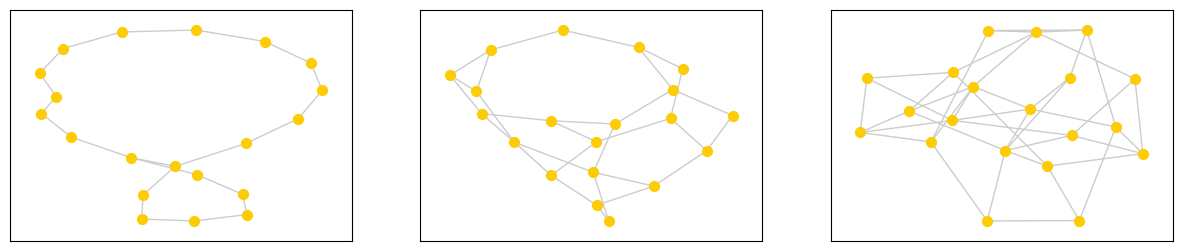

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15,3))
Gws1 = nx.newman_watts_strogatz_graph(20, 2, 0.01, seed=42)
Gws2 = nx.newman_watts_strogatz_graph(20, 2, 0.5, seed=42)
Gws3 = nx.newman_watts_strogatz_graph(20, 2, 0.99, seed=42)
pos1 = nx.spring_layout(Gws1)
pos2 = nx.spring_layout(Gws2)
pos3 = nx.spring_layout(Gws3)
nx.draw_networkx(Gws1, pos=pos1,with_labels=False,  node_color='#FDCC07',
                 edge_color='#cccccc', node_size=50, ax=axes[0])
nx.draw_networkx(Gws2, pos=pos2,with_labels=False,  node_color='#FDCC07',
                 edge_color='#cccccc', node_size=50, ax=axes[1])
nx.draw_networkx(Gws3, pos=pos3,with_labels=False,  node_color='#FDCC07',
                 edge_color='#cccccc', node_size=50, ax=axes[2])

# Link prediction

NetworkX provides several algorithms for calculating values that can facilitate link prediction in graphs.

- [resource_allocation_index](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_prediction.resource_allocation_index.html#networkx.algorithms.link_prediction.resource_allocation_index)
- [jaccard_coefficient](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_prediction.jaccard_coefficient.html#networkx.algorithms.link_prediction.jaccard_coefficient)
- [adamic_adar_index](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_prediction.adamic_adar_index.html#networkx.algorithms.link_prediction.adamic_adar_index)
- [preferential_attachment](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_prediction.preferential_attachment.html#networkx.algorithms.link_prediction.preferential_attachment)
- [cn_soundarajan_hopcroft](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_prediction.cn_soundarajan_hopcroft.html#networkx.algorithms.link_prediction.cn_soundarajan_hopcroft)
- [ra_index_soundarajan_hopcroft](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_prediction.ra_index_soundarajan_hopcroft.html#networkx.algorithms.link_prediction.ra_index_soundarajan_hopcroft)

All of the functions above return an iterator of 3-tuples containing (node_a, node_b, their_score).

Here we'll iterate through the first four functions, capture the results in a pandas DataFrame, and briefly view the results. These functions can be run on a subset of a graph by specifying the 'ebunch' (a list of 2-tuples (u, v) where u and v are nodes in the graph). By default, the functions evaluate the whole graph.

The last two functions are slightly different in that they require data on community structure in the graph.

In [7]:
import pandas as pd

In [8]:
measurements = pd.DataFrame()

for measure_name, measure_funct in {
    "resource_allocation_index": nx.resource_allocation_index,
    "jaccard_coefficient": nx.jaccard_coefficient,
    "adamic_adar_index": nx.adamic_adar_index,
    "preferential_attachment": nx.preferential_attachment,
}.items():

    these_vals = list(measure_funct(Gpa))
    temp_df = pd.DataFrame(data=these_vals, columns=['Source', 'Target', measure_name])

    if measurements.empty:
        measurements = temp_df
    else:
        measurements = measurements.merge(temp_df, how='left', on=['Source','Target'])

measurements.sample(5)

,Source,Target,resource_allocation_index,jaccard_coefficient,adamic_adar_index,preferential_attachment
1054,33,47,0.0,0.0,0.0,1
919,26,44,0.0,0.0,0.0,2
587,14,43,0.0,0.0,0.0,2
498,12,24,0.0,0.0,0.0,1
1116,38,44,0.0,0.0,0.0,1


The last two functions require data on known or predicted communities in the graph. We will cover communities and community-detection later in the course but here we'll identify potential communities and use that data to run the functions.

In [9]:
comm = nx.algorithms.community.greedy_modularity_communities(Gpa) #detect communities based on modularity

for comm_num,this_comm in enumerate(comm):
    temp_dict = {element:comm_num for element in this_comm} #create a temporary dict where keys=node id, values=community id
    nx.set_node_attributes(Gpa, temp_dict, 'community') #we name the node attribute 'community' because the two functions use it by default

The community-based measures for common neighbors and resource allocation index take a graph as well as an optional ebunch (as explained above) and the node attribute label indicating the community as parameters. Since we set the node attribute label to 'community' above and we want to run the functions on the entire graph we can rely on the defaults.

In [10]:
cn = list(nx.cn_soundarajan_hopcroft(Gpa))
ra = list(nx.ra_index_soundarajan_hopcroft(Gpa))

cn_df = pd.DataFrame(data=cn, columns=['Source','Target', 'cn_soundarajan_hopcroft'])
ra_df = pd.DataFrame(data=ra, columns=['Source','Target', 'ra_index_soundarajan_hopcroft'])

measurements = measurements.merge(cn_df).merge(ra_df)

In [11]:
measurements.sample(5)

,Source,Target,resource_allocation_index,jaccard_coefficient,adamic_adar_index,preferential_attachment,cn_soundarajan_hopcroft,ra_index_soundarajan_hopcroft
504,12,30,0.25,1.0,0.721348,1,2,0.25
562,14,17,0.00,0.0,0.000000,4,0,0.00
334,8,10,0.00,0.0,0.000000,2,0,0.00
382,9,20,0.00,0.0,0.000000,4,0,0.00
748,19,48,0.00,0.0,0.000000,2,0,0.00
